In [23]:
#import the libraries we used
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\asus\AppData\Local\Temp\ipykernel_8976\2151917237.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [24]:
# readout noise and mean bias level from bias images for selected region
ron_bias, mean_bias_level = [],[]
for i in range(10):
    bias = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/bias gain 2/bias-{i+1}.tiff", plugin="tifffile")
    std_bias, mean_bias = np.std(bias[110:250,110:250]), np.mean(bias[110:250,110:250])
    ron_bias.append(std_bias)
    mean_bias_level.append(mean_bias)
print(f"the readout noise = {np.round(np.mean(ron_bias),3)} \u00B1 {np.round(np.std(ron_bias),3)} ADU")
print(f"the mean bias level = {np.round(np.mean(mean_bias_level),3)} \u00B1 {np.round(np.std(mean_bias_level),3)} ADU")

the readout noise = 6.901 ± 0.066 ADU
the mean bias level = 99.511 ± 0.065 ADU


In [25]:
# making a mean row and column for median stacked bias images aka masterbias
masterbias = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/masterbias.tiff", plugin="tifffile")
df = pd.DataFrame(masterbias)
mean_column_bias, mean_row_bias = [], []
for column in df:
    mean_column_bias.append(np.mean(df[column]))
df1 = pd.DataFrame.transpose(df)
for row in df1:
    mean_row_bias.append(np.mean(df1[row]))

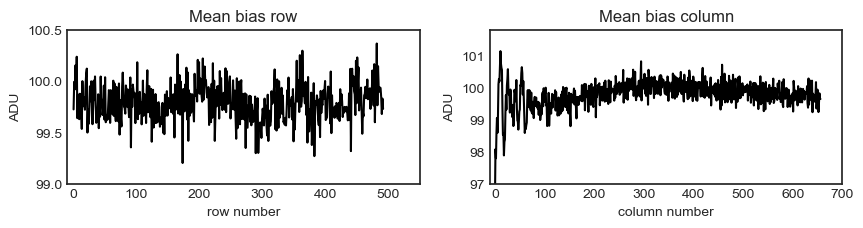

In [26]:
x = np.linspace(0,656,656)
x1 = np.linspace(0,492,492)
fig, ax = plt.subplots(1,2,figsize=(10,2))
#fig.subplots_adjust(hspace=0.7)
ax[0].plot(x1,mean_row_bias,'k')
ax[0].set(title="Mean bias row", xlabel='row number',ylabel='ADU', xlim=(-10,550), ylim=(99,100.5))
ax[1].plot(x,mean_column_bias,'k')
ax[1].set(title="Mean bias column", xlabel='column number', ylabel='ADU', xlim=(-10,700), ylim=(97,101.8))
plt.savefig("ALTS-Gain 2-Mean bias row and column.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

69.76887653266057

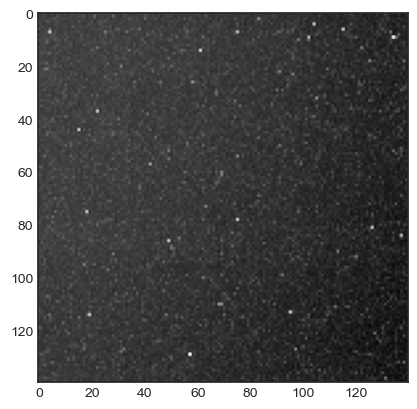

In [27]:
#check the flat frame, select a region with low std and minimal hot pixel/traps
f1 = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-50s-1.tiff", plugin="tifffile")
a=f1[110:250,110:250]
plt.imshow(a, cmap='gray', norm='log')
np.std(a)

In [28]:
#make an array for the mean counts, half variance, and exp time
exp_time = [1,2,3,4,5,6,9,12,20,25,30,35,40,45,50]

In [29]:
mean_count = []
#extract the mean counts from flat frames for selected region
for i, n in enumerate(exp_time):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-1.tiff", plugin="tifffile")
        mean_flat = np.mean(flatawal[110:250,110:250])
        mean_count.append(mean_flat)
print(mean_count)
print(len(mean_count))

[102.29795918367347, 105.67857142857143, 108.70892857142857, 111.93612244897959, 114.90035714285715, 118.45, 129.59729591836734, 140.29234693877552, 167.88408163265305, 184.30285714285714, 201.3970918367347, 218.43954081632654, 234.91704081632653, 251.42413265306124, 268.8401530612245]
15


In [30]:
variance_flat = []
#extract the half variance of substracted flat frames
for i, n in enumerate(exp_time):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-1.tiff", plugin="tifffile")
        flatakhir = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/flat-{n}s-2.tiff", plugin="tifffile")
        substract_flat = (np.array(flatawal[110:250,110:250], dtype=float)) - (np.array(flatakhir[110:250,110:250], dtype=float))
        var_flat = (np.var(np.abs(substract_flat))) *0.5
        variance_flat.append(var_flat)
print(variance_flat)
print(len(variance_flat))

[13.769795918367347, 18.170320470637236, 26.46521208741149, 28.48333231466056, 27.83631361802374, 27.133848209079552, 30.46772346938775, 31.809711993700542, 42.620650765306124, 45.82155374843815, 52.19747289540816, 56.24729595871513, 57.992387691326535, 65.6269107546335, 72.80896555601834]
15


In [31]:
#make a dataframe for the data to plot
data = {'exp time': exp_time, 'mean counts': mean_count, 'half variance': variance_flat}
df = pd.DataFrame(data)
df

,exp time,mean counts,half variance
0,1,102.297959,13.769796
1,2,105.678571,18.170320
2,3,108.708929,26.465212
3,4,111.936122,28.483332
4,5,114.900357,27.836314
5,6,118.450000,27.133848
6,9,129.597296,30.467723
7,12,140.292347,31.809712
8,20,167.884082,42.620651
9,25,184.302857,45.821554


Gradient of the slope = 0.302
The y-intercept = -9.598


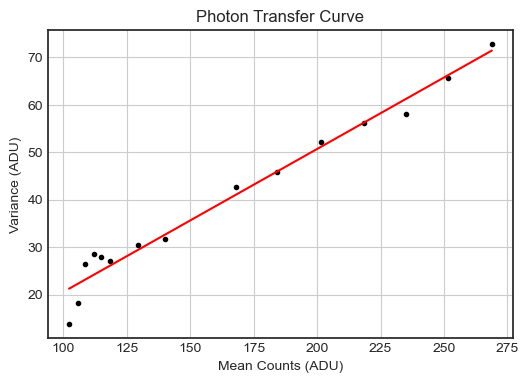

In [32]:
#linear regression for the transfer photon curve
from sklearn.linear_model import LinearRegression

#select mean counts as x and half variance as y
x = df['mean counts'].values.reshape(-1,1)
y = df['half variance'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,c='k',marker='.')
ax.plot(x,y_predict,'r-')
ax.set(title='Photon Transfer Curve', xlabel='Mean Counts (ADU)', ylabel='Variance (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef_slope = model.coef_[0,0]
const_y = model.intercept_[0]

#print the results
print(f'Gradient of the slope = {np.round(coef_slope,3)}')
print(f'The y-intercept = {np.round(const_y,3)}')
#save the figure
plt.savefig("ALTS-gain 2-Transfer Photon Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [33]:
#define the formula for the ccd parameter from the photon transfer curve
conv_fact = 1/coef_slope #the conversion factor or Gain formula
adc_value = 2**12 #12 bit of A/D Converter
readout_noise = np.sqrt(np.abs(const_y)) / coef_slope #readout noise formula
ron = np.mean(ron_bias) * conv_fact
full_well = (adc_value-1) / coef_slope #full well capacity formula
d_r = full_well / ron #dynamic range formula
enob = np.log10(d_r)/np.log10(2) #effective number of bit formula
d_r_db = 20 * np.log10(d_r) #dynamic range in dB

#print the result
print('Parameter of the CCD')
print(f'Conversion factor or Gain = {np.round(conv_fact,3)} e-/ADU')
print(f'Readout Noise from Transfer Photon Curve = {np.round(readout_noise,3)} e-/px')
print(f'Readout Noise from a bias image = {np.round(ron,3)} e-/px')
print(f'Full Well Capacity = {np.round(full_well,0)} e-')
print(f'Dynamic Range = {np.round(d_r,2)}')
print(f'Dynamic Range in dB = {np.round(d_r_db,1)} dB')
print(f'Effective Number of Bit = {np.round(enob,1)} bit')

Parameter of the CCD
Conversion factor or Gain = 3.317 e-/ADU
Readout Noise from Transfer Photon Curve = 10.275 e-/px
Readout Noise from a bias image = 22.888 e-/px
Full Well Capacity = 13582.0 e-
Dynamic Range = 593.42
Dynamic Range in dB = 55.5 dB
Effective Number of Bit = 9.2 bit


The Gradient of the Slope = 3.409
R Square = 0.9999143174549648


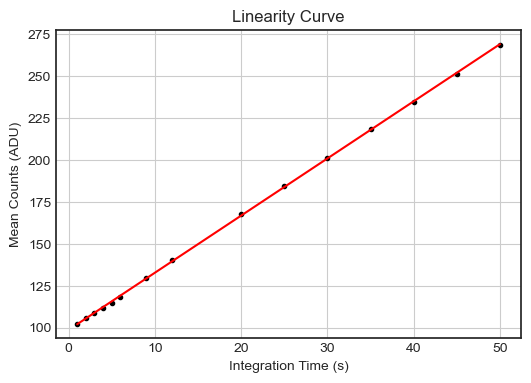

In [34]:
#linear regression for the linearity curves
#exp time as x and mean counts as y
xb = df['exp time'].values.reshape(-1,1)
yb = df['mean counts'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xb,yb)
y_predict = model.predict(xb)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xb,yb,c='k',marker='.')
ax.plot(xb,y_predict,'r-')
ax.set(title='Linearity Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef = model.coef_[0,0]
print(f'The Gradient of the Slope = {np.round(coef,3)}')
print(f'R Square = {model.score(xb,yb)}')
plt.savefig("ALTS-gain 2-Linearity Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [35]:
#array for the dark current
dark_current, dark_current_region = [], []
exp_time = [1,2,3,4,5,6,9,12,20,25,30,35,40,45,50]
#calculate the mean of dark frames
for i, n in enumerate(exp_time):
    for z in range(1):
        dark_image = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/dark-{n}s-1.tiff", plugin="tifffile")
        mean_dark = np.mean(dark_image)
        dark_reg = np.mean(dark_image[110:250,110:250])
        dark_current.append(mean_dark)
        dark_current_region.append(dark_reg)
print(dark_current)
print(len(dark_current))

[100.87888843446362, 102.5716339480468, 104.06755651397977, 105.65284490878446, 107.12786287923855, 108.89135930993456, 113.73746715744596, 118.89460328673408, 131.03609892425143, 138.7545452855443, 146.8869658437438, 154.65733442395398, 162.40356992365656, 170.53829875570096, 178.1974333234186]
15


In [36]:
#make a dataframe
data2 = {'exp time': exp_time, 'mean dark count': dark_current, 'mean dark region': dark_current_region}
df2 = pd.DataFrame(data2)
df2

,exp time,mean dark count,mean dark region
0,1,100.878888,101.715663
1,2,102.571634,104.819541
2,3,104.067557,107.269133
3,4,105.652845,109.965102
4,5,107.127863,112.378010
5,6,108.891359,115.505153
6,9,113.737467,124.631020
7,12,118.894603,133.934235
8,20,131.036099,156.837959
9,25,138.754545,171.075714


Gradient of the slope = 1.5778496959975676
Intercept = 99.43024001117303
R Square = 0.9999567299280295


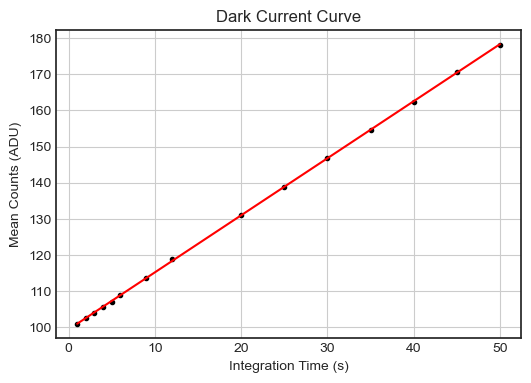

In [37]:
#linear regression for the dark current
xc = df2['exp time'].values.reshape(-1,1)
yc = df2['mean dark count'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xc,yc)
y_predict_c = model.predict(xc)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xc,yc,c='k',marker='.')
ax.plot(xc,y_predict_c,'r-')
ax.set(title='Dark Current Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define coef
coef_dark = model.coef_[0,0]
intercept_y_dark = model.intercept_[0]
print(f'Gradient of the slope = {coef_dark}')
print(f'Intercept = {intercept_y_dark}')
print(f'R Square = {model.score(xc,yc)}')
plt.savefig("ALTS-gain 2-Dark Current Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [38]:
dark_cur = coef_dark * conv_fact #dark current formula
bias_lev = intercept_y_dark * conv_fact #bias level formula

#print the result
print(f'Dark Current of the CCD = {np.round(dark_cur,3)} e-/s/pix')
print(f'Bias Level = {np.round(bias_lev,3)} e-/pix')

Dark Current of the CCD = 5.233 e-/s/pix
Bias Level = 329.78 e-/pix


In [39]:
#make a contour for dark images
dark_30s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/dark-30s-1.tiff", plugin="tifffile")
dark_60s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/dark-50s-1.tiff", plugin="tifffile")
df4 = pd.DataFrame(dark_30s)
df5 = pd.DataFrame(dark_60s)

In [40]:
x0 = np.linspace(0,656,656)
y0 = np.linspace(0,492,492)
X, Y = np.meshgrid(x0,y0)

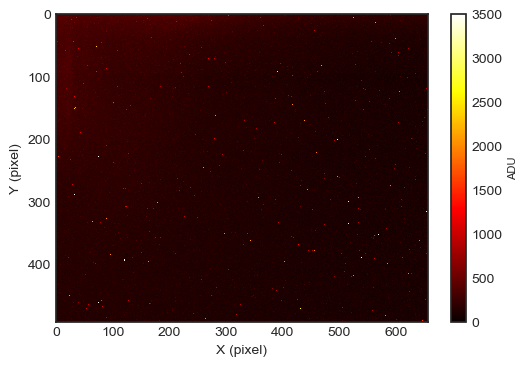

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.pcolor(X,Y, df4, cmap='hot', alpha=1, vmax=3500)
clb = fig.colorbar(cp) 
clb.set_label('ADU',fontsize=8)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-gain 2-Countour Dark 30s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

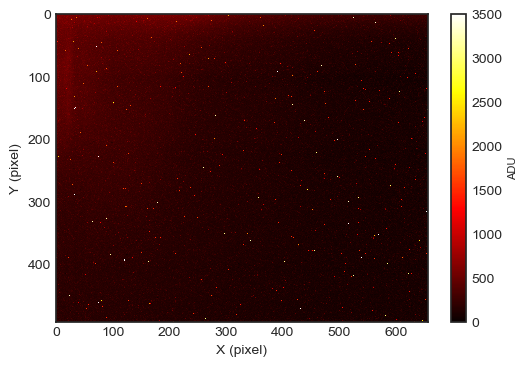

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.pcolor(X,Y, df5, cmap='hot', alpha=1, vmax=3500)
clb = fig.colorbar(cp) 
clb.set_label('ADU',fontsize=8)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-gain 2-Countour Dark 50s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

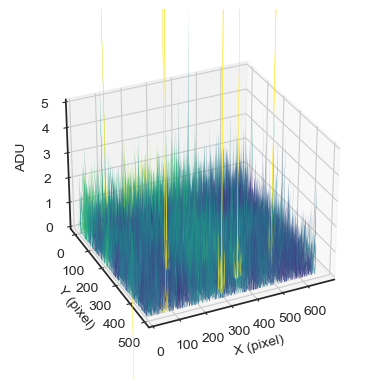

<Figure size 640x480 with 0 Axes>

In [43]:
#plot surface and contour for flat frames
from matplotlib.ticker import LinearLocator

flat_variasi = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/flat variasi/masterflat_variasi.tiff", plugin="tifffile")
df6 = pd.DataFrame(flat_variasi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
Z = df6

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap='viridis', linewidth=1, vmax=1.01)
#fig.colorbar(surf, shrink=0.4, aspect=10)
# Customize the axis and label
ax.set(xlabel='X (pixel)', ylabel='Y (pixel)', xlim=(692,0),zlim=(0,5))
ax.set_zlabel('ADU', rotation='vertical')
ax.view_init(30, 65, 0)
ax.set_box_aspect(None, zoom=0.85)
plt.show()
plt.savefig("ALTS-gain 2-Surface Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

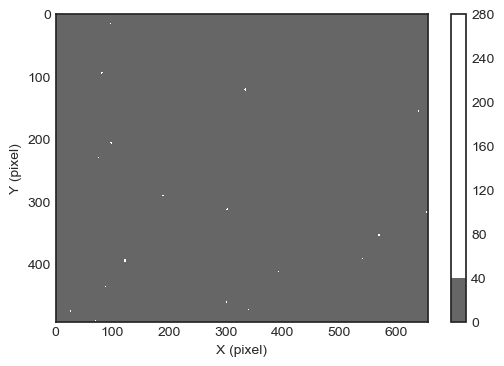

In [44]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
cp = ax.contourf(X, Y, Z, cmap='gray',vmax=50)
fig.colorbar(cp)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-gain 2-Countour Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)